Быстрый обзор конкурса "Titanic: Machine Learning from Disaster".       
В этом конкурсе предлагается по информации о пассажирах одного известного судна угадать, кто в итоге выжил.         
А мы сегодня поучимся работать с данными. Скачаем, посмотрим на таблички, построим простую модель машинного обучения, потом построим модель посложнее и увидим, к чему может привести излишняя сложность.

Поехали!

Читаем данные (каггл мне предложил в качестве первой ячейки следующее):

In [36]:
import pandas as pd

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/SESCDS/sescds/master/Lesson3/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Что означает каждый из стобцов можно посмотреть на странице конкурса.
Скопирую это сюда:

* **PassengerId** -- идентификатор пассажира (просто его номер в таблице). Этот столбец нужен только тем, кто отправляет на конкурс свое решение. То есть, чуть позже он нам пригодится.
* **Survived** -- Выжил ли пассажир в крушении. 0 означает "нет", 1 означает "да"
* **Pclass** -- Класс каюты пассажира. Всего классов три. Первый класс -- для самых богатых, третий -- для самых бедных.
* **Name** -- Имя пассажира
* **Sex** -- Пол
* **Age** -- Возраст
* **SibSp** -- Были ли на борту родственники одного возраста (братья/сестры) или супруг/супруга
* **Parch** -- Были ли на борту родители или дети
* **Ticket** -- Номер билета.
* **Fare** -- Стоимость билета
* **Cabin** -- Номер каюты. Если номер каюты неизвестен, написано NaN.
* **Embarked** -- В каком порту пассажир сел на борт. Всего их три: C = Cherbourg, Q = Queenstown, S = Southampton

# Первый взгляд, первый анализ
Давайте включим интуицию и немного подумаем (заодно можно вспомнить фильм).     
Корабль не затонул мгновенно. У людей было время сориентироваться и организовать эвакуацию на шлюпках. Они знали, что шлюпок на всех не хватит. Кто-то наверняка посчитал это сигналом для "каждый сам за себя, выживает сильнейший". Но большинство в таких ситуациях будет спасать в первую очередь женщин и детей. Наверное, на Титанике было что-то похожее.       
Еще вполне возможно, что на решение пустить того или иного человека на шлюпку влияло богатство и положение в обществе этого человека. То есть, класс каюты и стоимость билета.       
Можно продолжать рассуждения, но мы пока остановимся. Сейчас мы определили несколько критериев, которые, вероятно, были самыми важными. Кстати, сейчас, когда я это пишу, я еще не смотрел подробно на данные и не знаю, насколько я прав.         
Это неплохое упражнение на интуицию, которое некоторые эксперты в Data Science рекомендуют делать при любой возможности.            
Заодно познакомимся с еще одной библиотекой для рисования (это надстройка над matplotlib, она рисует более красивые картинки, но имеет меньше возможностей)

In [6]:
import seaborn as sns
%matplotlib inline

## Возраст

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


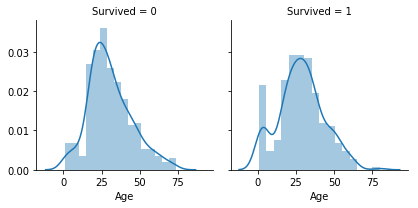

In [8]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

#### Задание 1:
Посмотрите на эти графики. Сделайте выводы. Верно ли, что у детей было больше шансов выжить? Людей какой возрастной группы на корабле было больше всего? Почему?[](http://)

## Пол 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


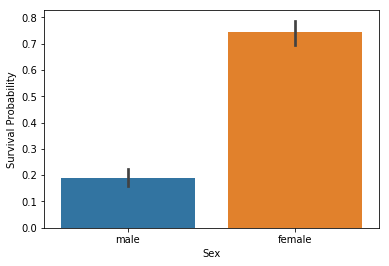

In [10]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")

#### Задание 2:
Посмотрите на эти графики. Что на них нарисовано? Верно ли, что женщины выживали чаще мужчин? Верно ли, что женщин выжило больше?

## Класс каюты

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


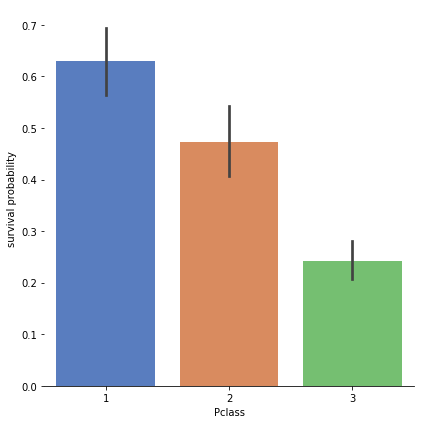

In [12]:
g = sns.factorplot(x="Pclass",y="Survived",data=train, kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#### Задание 3. 
Посмотрите на эти графики. Сделайте выводы о классовом неравестве. 

## Класс каюты и пол
На самом деле, мы посмотрели на данные крайне поверхностно. Рекомендую посмотреть документацию и галерею к этой библиотеке. Это натолкнет вас на новые мысли по поводу возможностей визуализации и возможных взаимосвязях в данных.         
Для затравки: вот как распределялась вероятсность выжить в зависимости от класса каюты и пола:

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


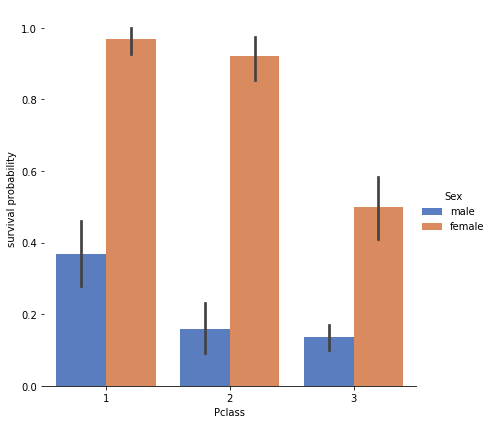

In [13]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

#### Задание 4
Посмотрите на эти данные. Верно ли, что мужчины среднего класса выживали с той же вероятностью, что и мужчина бедного класса? Верно ли, что женщины среднего класса выживали с почти той же вероятностью, что и женщины богатого класса? Как бы вы объяснили эти наблюдения?



Давайте построим простое предсказание. Возьмем в качестве признаков только разобранные выше столбцы. 

In [15]:
X = train[['Sex', 'Age', 'Pclass']]
y = train['Survived']
X.head()

,Sex,Age,Pclass
0,male,22.0,3
1,female,38.0,1
2,female,26.0,3
3,female,35.0,1
4,male,35.0,3


Преобразуем столбец "Пол" в столбец из нулей и единиц. Вы это уже несколько раз делали, даже, наверняка, разными способами. Покажу, пожалуй, лучший способ (работает быстро и хорошо справляется даже с большим числом категорий)

In [19]:
X['Sex'] = X['Sex'].astype('category').cat.codes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Также, в этом датасете есть пропущенные данные: про некоторых пассажиров неизвестен их возраст.       
Работу с пропущенными данными мы расмотрим позже, а сейчас просто заполним их средним возрастом (один из стандартных способов работы с пропусками)

In [21]:
X['Age'].fillna(X['Age'].mean(), inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Задание 5:
Разбейте датасет на обучающую и валидационную выборки, назовите их X_train, y_train, X_val, y_val

Давайте обучим решающее дерево, аналогично предыдущему ноутбуку.      
#### Задание 6:
Обучите решающее дерево (с параметрами по умолчанию). Назовите его tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

И оценим качество алгоритма метрикой accuracy
####  Задание 7
Оцените качество алгоритма метрикой accuracy. Для этого, постройте предсказание на множестве X_val и сравните это с y_val

0.7694915254237288

Одно из преемуществ решающего дерева: возможность его нарисовать. Давайте же нарисуем наше дерево. 

In [28]:
import graphviz 
from sklearn.tree import export_graphviz

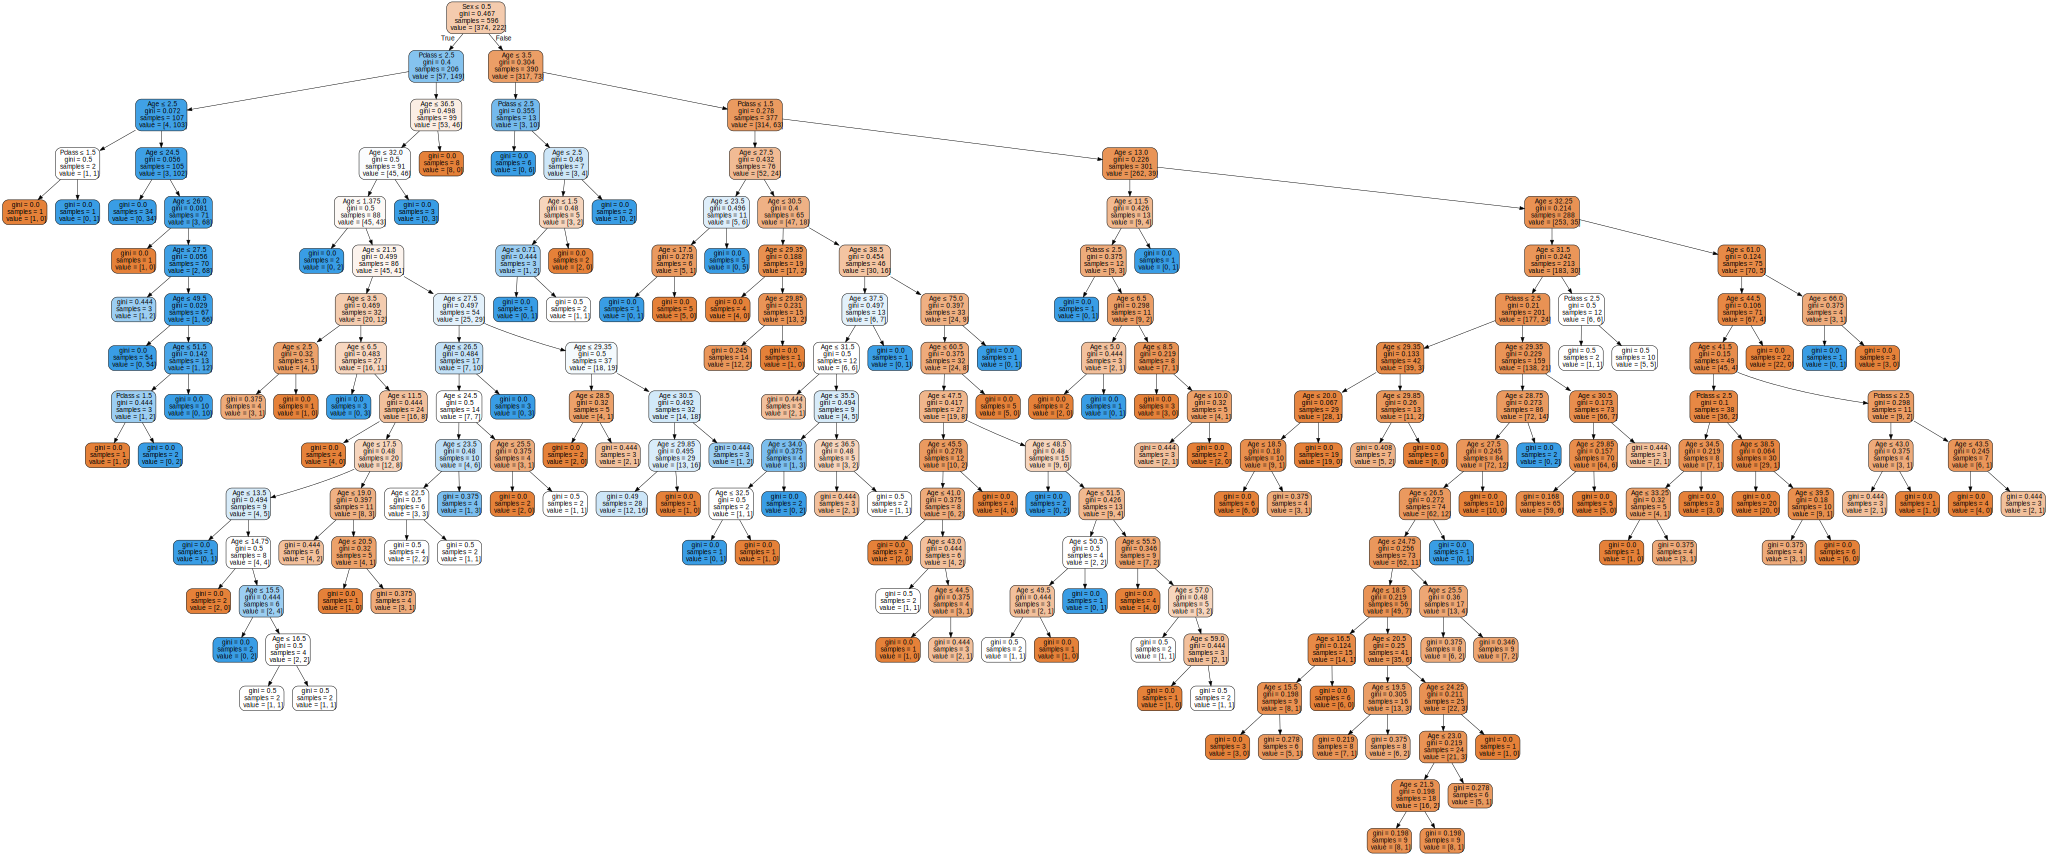

In [30]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)

Дерево обычно рисуют для того, чтобы получить некоторое представление о том, как  можно принимать решение на основе имеющихся данных.       
В данной визуализации первой строкой в ячейке написано решающее правило, третьей -- количество элементов обучающей выборки, которые попали в этот лист дерева. 
#### Задание 8
Попытайтесь понять, как работает это дерево. Потратьте на это пару минут, больше не надо. Обратите внимание, сколько элементов оказывается в листе. 

.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
.             
В общем, правильное дерево должно быть поменьше. Это слишком хорошо настроилось на обучающую выборку. Включая ее особенности, шумы и лики.          
Давайте теперь построим нормальное решающее дерево.           
Для этого, зададим дереву ограничение на максимальную глубину (чтобы процесс построение дерева не продолжался так долго, как это возможно).         
За это ограничение отвечает параметр дерева max_depth. Давайте зададим его равным 3
#### Задание 9:
Создайте такое дерево (назовите его tree2). Обучите на X_train.         
Как изменилась точность алгоритма на новых для него данных? А как при этом она изменилась на обучающей выборке?

Давайте теперь нарисуем новое дерево

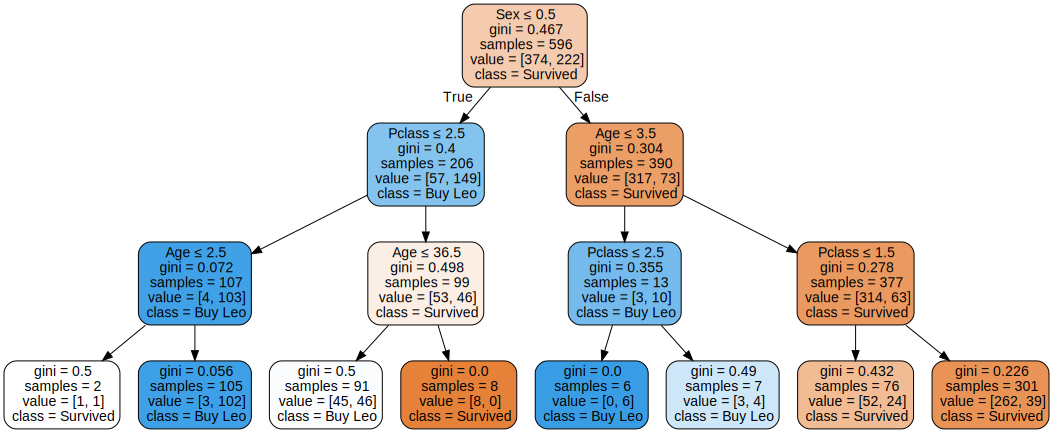

In [35]:
dot_data = export_graphviz(tree2, out_file=None, 
                         feature_names=X.columns, 
                         class_names=['Survived', 'Buy Leo'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)

Теперь тут хоть понятная картинка нарисована. Давайте получше ее поймем. Возьмем первый элемент нашей выборки:

In [33]:
X.head(1)

,Sex,Age,Pclass
0,1,22.0,3


#### Задание 10. 
Глядя на картинку дерева, опишите процесс построения предсказания по этому пассажиру. 

Мы почти готовы к первому коммиту на каггл. И мы его сделаем в следующий раз. 